In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier

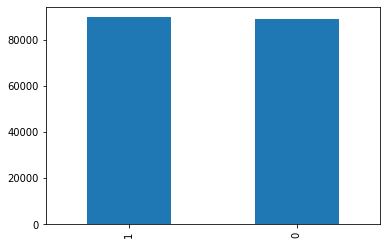

In [2]:
training_3=pd.read_excel("data_completed_4.xlsx")
training_3
training_3.target.value_counts().plot(kind='bar')
training_3.target.value_counts()
training_3.columns
training_3['address'] = training_3.apply(lambda x: ''.join(x['merged_data'].lower() + ' ' + str(x['merge_data_2'])), axis=1)


In [3]:
training_3[training_3.target==1]

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target,address
0,0,xxxxxxxxxxxxxxxJA BUSINESS UNIT,LOHJA,8150,1,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,xxxxxxxxxxxxxxxJA BUSINESS UNIT LOHJA 8150,1,xxxxxxxxxxxxxxxja business unit lohja 8150 xxx...
5,5,xxxxxxxxxxxxxINKOJANKAARI 9,TURKU,20320,6,xxxxxxxxxxxxxINKOJANKAARI 9 TURKU 20320,xxxxxxxxxxxxxINKOJANKAARI 9 TURKU 20320,1,xxxxxxxxxxxxxinkojankaari 9 turku 20320 xxxxxx...
6,6,xxxxxxxxxxxxJUUNTIE 17 19,PORI,28360,38,xxxxxxxxxxxxJUUNTIE 17 19 PORI 28360,xxxxxxxxxxxxjuuntie 17-19 Pori 28360 28360,1,xxxxxxxxxxxxjuuntie 17 19 pori 28360 xxxxxxxxx...
9,9,xxxxxxxxxxxxxxASRINTEENTIE 22,ROVANIEMI,96400,4,xxxxxxxxxxxxxxASRINTEENTIE 22 ROVANIEMI 96400,xxxxxxxxxxxxxxASRINTEENTIE 22 ROVANIEMI 96400,1,xxxxxxxxxxxxxxasrinteentie 22 rovaniemi 96400 ...
10,10,xxxxxxxxxxxrmaajantie 6,JYVÄSKYLÄ,40320,2,xxxxxxxxxxxrmaajantie 6 JYVÄSKYLÄ 40320,xxxxxxxxxxxrmaajantie 6 JYVÄSKYLÄ 40320,1,xxxxxxxxxxxrmaajantie 6 jyväskylä 40320 xxxxxx...
...,...,...,...,...,...,...,...,...,...
178576,178576,xxxxxxxxxxxSITIE 8 LEVI,SIRKKA,99130,5,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,xxxxxxxxxxxSITIE 8 LEVI SIRKKA 99130,1,xxxxxxxxxxxsitie 8 levi sirkka 99130 xxxxxxxxx...
178577,178577,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22,LAHTI,15140,2,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 LAHTI 15140,1,xxxxxxxxxxxxxxxxxxksanterinkatu 18-22 lahti 15...
178578,178578,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS,OULU,90100,8,xxxxxxxxxxxxxxxxxERTINKATU 16 5 KRS OULU 90100,xxxxxxxxxxxMIKATU 31-33 OULU 90100,1,xxxxxxxxxxxxxxxxxertinkatu 16 5 krs oulu 90100...
178579,178579,xxxxxxxxxxxjauksentie 2,Riihimaki 11100,11100,2,xxxxxxxxxxxjauksentie 2 Riihimaki 11100 11100,xxxxxxxxxxxJAUKSENTIE 2 RIIHIMÄKI 11120,1,xxxxxxxxxxxjauksentie 2 riihimaki 11100 11100 ...


In [4]:
training_3=shuffle(training_3)

In [5]:
training_3=training_3.reset_index().drop(['index'],1)

In [6]:
counter_=CountVectorizer()
tfidf_=TfidfVectorizer()

In [7]:
training_3

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target,address
0,71212,xxxxxxxxxxxxxxxxxxpastentie 1 2015362,Pattijoki,92140,9,xxxxxxxxxxxxxxxxxxpastentie 1 2015362 Pattijok...,xxxxxxxxKONKATU 1 HELSINKI 100,0,xxxxxxxxxxxxxxxxxxpastentie 1 2015362 pattijok...
1,103087,xxxxxxxLINJA 25,TURKU,20750,4,xxxxxxxLINJA 25 TURKU 20750,xxxxxxxlinja 25 TURKU 20750,1,xxxxxxxlinja 25 turku 20750 xxxxxxxlinja 25 TU...
2,169468,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32",HELSINKI,290,7,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32 HE...",xxxxxxxxxxxxxxeliuksenkatu 32 HELSINKI 290,1,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32 he..."
3,37353,xxxxxxxxxxtelettare 1,Helsinki,420,22,xxxxxxxxxxtelettare 1 Helsinki 420,xxxxxxxxxxtelettare 1 Helsinki 420,1,xxxxxxxxxxtelettare 1 helsinki 420 xxxxxxxxxxt...
4,141878,xxxxxxxxxxxxxkkailijantie 3,KUOPIO,70200,9,xxxxxxxxxxxxxkkailijantie 3 KUOPIO 70200,xxxxxxxxxxxaasatama 106 Hanko 10900 10900,0,xxxxxxxxxxxxxkkailijantie 3 kuopio 70200 xxxxx...
...,...,...,...,...,...,...,...,...,...
178576,77194,xxxxxxxinkatu 3,Helsinki,100,19,xxxxxxxinkatu 3 Helsinki 100,xxxxxxxxkonkatu 3 HELSINKI 100,1,xxxxxxxinkatu 3 helsinki 100 xxxxxxxxkonkatu 3...
178577,142724,"xxxxxxxxxxxxxxxxxxxxO RIPATTI, AUTOMYYNTI",LAPPEENRANTA,53500,7,"xxxxxxxxxxxxxxxxxxxxO RIPATTI, AUTOMYYNTI LAPP...",xxxxxxxxxeninkatu 2 HÄMEENLINNA 13100,0,"xxxxxxxxxxxxxxxxxxxxo ripatti, automyynti lapp..."
178578,50048,xxxxxxxxxTAANTIE 18,"PUNKAHARJU, PUNKAHARJU",58500,7,"xxxxxxxxxTAANTIE 18 PUNKAHARJU, PUNKAHARJU 58500",xxxxxxxxxxxaajankatu 24 Helsinki 880,0,"xxxxxxxxxtaantie 18 punkaharju, punkaharju 585..."
178579,16321,xxxxxxxxxxxxxTEKANKAANTIE 4,JOENSUU,80100,14,xxxxxxxxxxxxxTEKANKAANTIE 4 JOENSUU 80100,xxxxxxxxxxxxpavaarantie 4 HÄMEENKYRÖ 39200,0,xxxxxxxxxxxxxtekankaantie 4 joensuu 80100 xxxx...


In [8]:
#TF-IDF Vectorizer#CountVectorizer
# seed = 123
# np.random.seed(seed)
# x_train,x_test,y_train,y_test=train_test_split(training_data_count,target,test_size=.25,random_state=seed)



In [9]:
# train=training_3[["merged_data","merge_data_2"]]
# seed = 123
# np.random.seed(seed)
# x_train2,x_test2,y_train2,y_test2=train_test_split(train,target,test_size=.25,random_state=seed)
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(x_train2)
# X_test= vectorizer.fit_transform(x_test2)
# from sklearn.preprocessing import MaxAbsScaler
# transformer1 = MaxAbsScaler().fit(X_train)
# X_train_data_tfidf = transformer1.transform(X_train)
# X_test_data_tfidf = transformer2.transform(X_test)

In [10]:
df=training_3

In [11]:
df

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target,address
0,71212,xxxxxxxxxxxxxxxxxxpastentie 1 2015362,Pattijoki,92140,9,xxxxxxxxxxxxxxxxxxpastentie 1 2015362 Pattijok...,xxxxxxxxKONKATU 1 HELSINKI 100,0,xxxxxxxxxxxxxxxxxxpastentie 1 2015362 pattijok...
1,103087,xxxxxxxLINJA 25,TURKU,20750,4,xxxxxxxLINJA 25 TURKU 20750,xxxxxxxlinja 25 TURKU 20750,1,xxxxxxxlinja 25 turku 20750 xxxxxxxlinja 25 TU...
2,169468,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32",HELSINKI,290,7,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32 HE...",xxxxxxxxxxxxxxeliuksenkatu 32 HELSINKI 290,1,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32 he..."
3,37353,xxxxxxxxxxtelettare 1,Helsinki,420,22,xxxxxxxxxxtelettare 1 Helsinki 420,xxxxxxxxxxtelettare 1 Helsinki 420,1,xxxxxxxxxxtelettare 1 helsinki 420 xxxxxxxxxxt...
4,141878,xxxxxxxxxxxxxkkailijantie 3,KUOPIO,70200,9,xxxxxxxxxxxxxkkailijantie 3 KUOPIO 70200,xxxxxxxxxxxaasatama 106 Hanko 10900 10900,0,xxxxxxxxxxxxxkkailijantie 3 kuopio 70200 xxxxx...
...,...,...,...,...,...,...,...,...,...
178576,77194,xxxxxxxinkatu 3,Helsinki,100,19,xxxxxxxinkatu 3 Helsinki 100,xxxxxxxxkonkatu 3 HELSINKI 100,1,xxxxxxxinkatu 3 helsinki 100 xxxxxxxxkonkatu 3...
178577,142724,"xxxxxxxxxxxxxxxxxxxxO RIPATTI, AUTOMYYNTI",LAPPEENRANTA,53500,7,"xxxxxxxxxxxxxxxxxxxxO RIPATTI, AUTOMYYNTI LAPP...",xxxxxxxxxeninkatu 2 HÄMEENLINNA 13100,0,"xxxxxxxxxxxxxxxxxxxxo ripatti, automyynti lapp..."
178578,50048,xxxxxxxxxTAANTIE 18,"PUNKAHARJU, PUNKAHARJU",58500,7,"xxxxxxxxxTAANTIE 18 PUNKAHARJU, PUNKAHARJU 58500",xxxxxxxxxxxaajankatu 24 Helsinki 880,0,"xxxxxxxxxtaantie 18 punkaharju, punkaharju 585..."
178579,16321,xxxxxxxxxxxxxTEKANKAANTIE 4,JOENSUU,80100,14,xxxxxxxxxxxxxTEKANKAANTIE 4 JOENSUU 80100,xxxxxxxxxxxxpavaarantie 4 HÄMEENKYRÖ 39200,0,xxxxxxxxxxxxxtekankaantie 4 joensuu 80100 xxxx...


In [14]:
for i in range(len(df)):
    df.merged_data[i]=df.merged_data[i].replace('x','')
    df.merge_data_2[i]=df.merge_data_2[i].replace('x','')

In [15]:
df

,Unnamed: 0,Address,City,Post Code,Merged Stops,merged_data,merge_data_2,target,address
0,71212,xxxxxxxxxxxxxxxxxxpastentie 1 2015362,Pattijoki,92140,9,pastentie 1 2015362 Pattijoki 92140,KONKATU 1 HELSINKI 100,0,xxxxxxxxxxxxxxxxxxpastentie 1 2015362 pattijok...
1,103087,xxxxxxxLINJA 25,TURKU,20750,4,LINJA 25 TURKU 20750,linja 25 TURKU 20750,1,xxxxxxxlinja 25 turku 20750 xxxxxxxlinja 25 TU...
2,169468,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32",HELSINKI,290,7,"eliuksenkatu, 1.krs 32 HELSINKI 290",eliuksenkatu 32 HELSINKI 290,1,"xxxxxxxxxxxxxxxxxxxxxeliuksenkatu, 1.krs 32 he..."
3,37353,xxxxxxxxxxtelettare 1,Helsinki,420,22,telettare 1 Helsinki 420,telettare 1 Helsinki 420,1,xxxxxxxxxxtelettare 1 helsinki 420 xxxxxxxxxxt...
4,141878,xxxxxxxxxxxxxkkailijantie 3,KUOPIO,70200,9,kkailijantie 3 KUOPIO 70200,aasatama 106 Hanko 10900 10900,0,xxxxxxxxxxxxxkkailijantie 3 kuopio 70200 xxxxx...
...,...,...,...,...,...,...,...,...,...
178576,77194,xxxxxxxinkatu 3,Helsinki,100,19,inkatu 3 Helsinki 100,konkatu 3 HELSINKI 100,1,xxxxxxxinkatu 3 helsinki 100 xxxxxxxxkonkatu 3...
178577,142724,"xxxxxxxxxxxxxxxxxxxxO RIPATTI, AUTOMYYNTI",LAPPEENRANTA,53500,7,"O RIPATTI, AUTOMYYNTI LAPPEENRANTA 53500",eninkatu 2 HÄMEENLINNA 13100,0,"xxxxxxxxxxxxxxxxxxxxo ripatti, automyynti lapp..."
178578,50048,xxxxxxxxxTAANTIE 18,"PUNKAHARJU, PUNKAHARJU",58500,7,"TAANTIE 18 PUNKAHARJU, PUNKAHARJU 58500",aajankatu 24 Helsinki 880,0,"xxxxxxxxxtaantie 18 punkaharju, punkaharju 585..."
178579,16321,xxxxxxxxxxxxxTEKANKAANTIE 4,JOENSUU,80100,14,TEKANKAANTIE 4 JOENSUU 80100,pavaarantie 4 HÄMEENKYRÖ 39200,0,xxxxxxxxxxxxxtekankaantie 4 joensuu 80100 xxxx...


In [27]:
import numpy as np
from numpy import hstack

In [29]:
tfidf_vectorizer = TfidfVectorizer()
# raw_data = pd.DataFrame(*raw_data, columns = ['id', 'is_identical', 'q1', 'q2'])
tf_train_data = pd.concat([df['merged_data'], df['merge_data_2']])
trained_tf_idf_transformer = tfidf_vectorizer.fit_transform(tf_train_data)
data1= tfidf_vectorizer.transform(df['merged_data'])
data2 = tfidf_vectorizer.transform(df['merge_data_2'])
# data_for_model = df[['tf_idf_q1', 'tf_idf_q2', 'target']]
X= hstack([data1,data2])
Y = df['target'].values


In [30]:
X


array([<178581x8140 sparse matrix of type '<class 'numpy.float64'>'
       	with 685009 stored elements in Compressed Sparse Row format>,
       <178581x8140 sparse matrix of type '<class 'numpy.float64'>'
       	with 685016 stored elements in Compressed Sparse Row format>],
      dtype=object)

In [31]:

seed = 123
np.random.seed(seed)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=seed)
model = LogisticRegression()
model.fit(x_train, y_train)
pred_tfidf=model.predict(x_test)
accuracy_score(y_test,pred_tfidf)

ValueError: Found input variables with inconsistent numbers of samples: [2, 178581]

LogisticRegression()

0.7397303229852619

In [64]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
pred_tfidf=model.predict(x_test)
accuracy_score(y_test,pred_tfidf)

0.9947139721363616

In [57]:
# from scipy.sparse import coo_matrix, hstack 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
# tfidf_vectorizer_2=TfidfVectorizer(use_idf=True, max_df=0.95)

# data1=tfidf_vectorizer.fit_transform(training_3['merged_data'].values)
# data2=tfidf_vectorizer_2.fit_transform(training_3['merge_data_2'].values)

# # data1 = tfidf_vectorizer.transform(training_3['merged_data'].values)
# # data2 = tfidf_vectorizer_2.transform(training_3['merge_data_2'].values)

# X= hstack([data1,data2])

In [58]:
# vectorizer = CountVectorizer()
# X_count = vectorizer.fit_transform(training_3["address"])

# from sklearn.preprocessing import MaxAbsScaler
# transformer = MaxAbsScaler().fit(X_count)
# training_data_count = transformer.transform(X_count)

In [59]:
# target=training_3.target

In [35]:
RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,

(sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.ensemble._forest.ExtraTreesClassifier,
 sklearn.ensemble._gb.GradientBoostingClassifier)

In [37]:
model2=LogisticRegression()
model2=RandomForestClassifier()

model4=ExtraTreesClassifier()
model5=GradientBoostingClassifier()

In [38]:
model2.fit(x_train,y_train)
pred_tfidf=model2.predict(x_test)
accuracy_score(y_test,pred_tfidf) #..........................TFIDF ACCURACY..........................

0.9946691752900596

In [ ]:
# checking overvfitting and underfitting


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,pred_tfidf))
print(classification_report(y_test2,pred_tfidf))
print(accuracy_score(y_test2,pred_tfidf))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred_count))
print(classification_report(y_test,pred_count))
print(accuracy_score(y_test,pred_count))

In [ ]:
# def predict_car(s,train=training_3,model=log_obj_TFIDF):
#     pred=model.predict(training_data_tfidf_)
#     print(train.target[pred_tfidf[0]])
#     return train.target[pred_tfidf[0]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [ ]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(x_train2, y_train2)
# Number of folds for cross validation
num_folds = 7

In [ ]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [ ]:
num_folds = 7

In [ ]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

In [ ]:
plot_validation_curve(clf_1, x_train2, y_train2, param_name='max_depth', param_range=range(2,13))


In [ ]:
mod=RandomForestClassifier()
mod.fit(x_train2,y_train2)
pred=mod.predict(x_test2)
accuracy_score(y_test2,pred)

In [ ]:
training_3

In [ ]:
x_test2

In [ ]:
testing=pd.read_excel("combined_data.xls")

In [ ]:
testing['merged']=np.nan

In [ ]:
for i in range(len(testing)):
    testing['merged'][i]=str(testing.Address[i])+" "+str(testing.City[i])+" "+str(testing['Post Code'][i])

In [ ]:
testing['merged_2']=np.nan

In [ ]:
for i in range(len(testing)):
    testing['merged_2'][i]=str(testing.Address[i])+" "+str(testing.City[i])+" "+str(testing['Post Code'][i])

In [ ]:
testing.merged_2=shuffle(testing.merged)

In [ ]:
testing

In [ ]:
testing['address'] = testing.apply(lambda x: ''.join(x['merged'].lower() + ' ' + str(x['merged_2'])), axis=1)


In [ ]:
testing

In [ ]:
test=testing[:5]

In [ ]:
test

In [1]:
import pickle

In [ ]:
with open("random_forest_model.pkl",'rb') as file:
    model=pickle.load(file)

In [ ]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(training_3["address"])
# from sklearn.preprocessing import MaxAbsScaler
# transformer = MaxAbsScaler().fit(X)
# training_data_tfidf = transformer.transform(X)

In [ ]:
vectorizer_ = TfidfVectorizer()
X_count_ = vectorizer_.fit_transform(test["address"])

from sklearn.preprocessing import MaxAbsScaler
transformer_ = MaxAbsScaler().fit(X_count_)
training_data_count_ = transformer_.transform(X_count_)

In [ ]:
training_data_count_

In [ ]:
pred_test=model.predict(training_data_count_)

In [6]:
g="jkllsl"
g

'jkllsl'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.sparse import coo_matrix, hstack

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
class Model_Implementation():
    def Model(self,data_in_form_of_dataframe,model_name):
        data=data_in_form_of_dataframe
        data.target.value_counts().plot(kind='bar')# ploting barchart to check target values.
        data.target.value_counts()
        data.columns
        data=shuffle(data)
        data=data.reset_index().drop(['index'],1)
        target=data.target
        counter_object=CountVectorizer()# text conversion into vector form by using CountVectorizer
        tfidf_object=TfidfVectorizer()  #text conversion into vector form by using TfidfVectorizer
        def remove_x_char_from_data(data_in_form_of_dataframe):# removing 'x' from dataset
            data=data_in_form_of_dataframe
            for i in range(len(data)):
                data.merged_data[i]=data.merged_data[i].replace('x','')
                data.merge_data_2[i]=data.merge_data_2[i].replace('x','')
                return data
        data=remove_x_char_from_data(data)
        tfidf_vectorizer = TfidfVectorizer()
        tf_train_data = pd.concat([data['merged_data'], data['merge_data_2']])# concate merged data(City,address,passcode)
        #merged_data merged in the form of (City + Address + passcode(zipcode))
        # merge_data_2 and merged_data having similar and non similar data,but both are merged in (City + address +passcode)
        trained_tf_idf_transformer = tfidf_vectorizer.fit_transform(tf_train_data)
        with open("tfidf_vect.pkl",'wb') as file:
            pickle.dump(trained_tf_idf_transformer,file)
        Vectorized_transform_Data_of_merged_data = tfidf_vectorizer.transform(data['merged_data'])
        Vectorized_transform_Data_of_merge_data_2 = tfidf_vectorizer.transform(data['merge_data_2'])
        X= hstack([Vectorized_transform_Data_of_merged_data,Vectorized_transform_Data_of_merge_data_2])
        Y = data['target'].values
#         cv = KFold(n_splits=10, random_state=1, shuffle=True)
        
      
#         scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#         # report performance
#         print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
        
        
     
        seed = 123
        np.random.seed(seed)
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=seed)
        model=model_name
        model.fit(x_train, y_train)
        
        pred_tfidf=model.predict(x_test)
        with open("svm_model.pkl",'wb') as file:
            pickle.dump(model,file)
        return round(accuracy_score(y_test,pred_tfidf),2)
     








In [2]:
data=pd.read_excel("data_completed_4.xlsx")



0.99

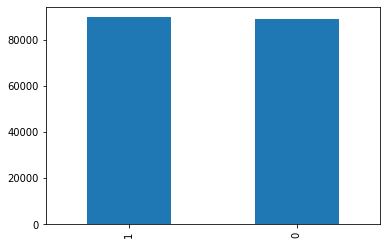

In [9]:
import pickle
dataclass_obj=Model_Implementation()
#naive_object=MultinomialNB()
svc_model=SVC()
# decision_tree=DecisionTreeClassifier()
# random_forest=RandomForestClassifier()
#logistic_obj=LogisticRegression()
#naive_accuracy=dataclass_obj.Model(data,naive_accuracy)
dataclass_obj.Model(data,svc_model)
#svc_model_acc=dataclass_obj.Model(data,svc_model)
# decision_tree_acc=dataclass_obj.Model(data,decision_tree)

# random_forest_acc=dataclass_obj.Model(data,random_forest)
#print("Model_accuracies are :",Logistic_acc)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pickle
import argparse
import os
import json
import time
import numpy as np
from scipy.sparse import coo_matrix, hstack

if not os.path.exists('./output'):
    os.mkdir('./output')

if not os.path.exists('./output/temp'):
    os.mkdir('./output/temp')

def get_predictions(data, loaded_model,loaded_transformer):
    similar_address_dict = {}
    similar_found = set()
    for index in range(len(data)-1):
        if index not in similar_found:
            address_1 = data.loc[index, 'address']
            for j in range(index+1,len(data)):
                if j not in similar_found:
                    address_2 = data.loc[j, 'address']
                    t1=loaded_transformer.transform([address_1])
                    t2=loaded_transformer.transform([address_2])
                    X_test = hstack([t1,t2])
                    prediction = loaded_model.predict(X_test)
                    if prediction[0] == 1:
                        similar_found.add(index)
                        similar_found.add(j)
                        if index not in similar_address_dict.keys():
                            similar_address_dict[index] = [j]
                        else:
                            similar_address_dict[index].append(j)
    
    return similar_address_dict, similar_found


def assign_stop_number(data,similar_address_dict, similar_found):
    data['Model Merged Stop'] = np.nan
    stop_number = 1
    for key, values in similar_address_dict.items():
        data.loc[key,'Model Merged Stop'] = stop_number
        for i in similar_address_dict[key]:
            data.loc[i,'Model Merged Stop'] = stop_number
        stop_number = stop_number + 1

    for i in range(len(data)):
        if i not in similar_found:
            data.loc[i,'Model Merged Stop'] = stop_number
            stop_number = stop_number + 1
    
    data['Model Merged Stop'] = data['Model Merged Stop'].astype('int')

    sorted_df = data.sort_values(by='Model Merged Stop')
    sorted_df.reset_index(inplace=True, drop=True)
    sorted_df = sorted_df.drop(['address'], axis = 1)
    return sorted_df

def write_output(output_filepath,merged_data):
    merged_data.to_csv(output_filepath)
   # print('[INFO] Output generated successfully!')


if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('file', help='pass the input excel file for a merging')
#     args = parser.parse_args()
    filepath = './246889360_task_number.xlsx'
    model_path="./naive_model.pkl"
    transformer_path="./transformer.pkl"
    loaded_model = pickle.load(open(model_path, 'rb'))
    loaded_transformer = pickle.load(open(transformer_path, 'rb'))
    final_df = pd.DataFrame(columns = ['Transport Task', 'Shipment Number', 'Name', 'Address', 'City', 'Post Code', 'Merged Stops', 'Stop Number Without Merge', 'Model Merged Stop'])
    start = time.time()
    if len(filepath)>0:
        #print(filepath.split('/')[2])
        complete_data = pd.read_excel(filepath)
        print(complete_data)
        if 'Unnamed: 0' in complete_data.columns:
            complete_data.drop(['Unnamed: 0'],axis=1,inplace=True)
        complete_data.columns = ['Transport Task', 'Shipment Number', 'Name', 'Address', 'City', 'Post Code', 'Merged Stops', 'Stop Number Without Merge']
        complete_data = complete_data.dropna()
        complete_data['Post Code'] = complete_data['Post Code'].astype('int')
        complete_data['Post Code'] = complete_data['Post Code'].astype('str')
        complete_data['address'] = complete_data.apply(lambda x: ''.join(x['Address'].lower() + ' ' + x['City'] + ' ' + str(x['Post Code'])), axis=1)
        grouped_data = complete_data.groupby('Transport Task')
        gb = grouped_data.groups
        merged_data = {'Transport Task' : '', 'Shipment Number': '', 'Name': '', 'Address': '', 'City': '', 'Post Code': '',
         'Merged Stops': '', 'Stop Number Without Merge': '', 'Model Merged Stop': ''}
        for group_key, values in gb.items():
            g_start = time.time()
            #print(group_key)
            data = grouped_data.get_group(group_key)
            data.reset_index(drop=True, inplace=True)
            similar_address_dict, similar_found = get_predictions(data, loaded_model,loaded_transformer)
            merged_data = assign_stop_number(data,similar_address_dict, similar_found)
            final_df = final_df.append(merged_data, ignore_index=True)
            outfilename = 'output_' + str(group_key) + '_merged_results_random_forest.csv'
            output_filepath = './output/temp/' + outfilename
            write_output(output_filepath,merged_data)
            g_end = time.time()
            g_total = g_end - g_start
            #print('One group completed in {} seconds!'.format(g_total))
        
    if not final_df.empty:
        final_df.reset_index(drop=True,inplace=True)
        final_df.to_excel('./output/rf_results_{}'.format(filepath.split('/')[2]))

#     else:
#         print('[ERROR] Enter a valid path.......Terminating')
    end = time.time()
    total_time = end - start
    #print('Process completed in {} seconds'.format(total_time) )
        
        






    Unnamed: 0  Transport Task    Shipment Number  \
0        17046       246889360  xxxxxxxxxxxxx7886   
1        17047       246889360  xxxxxxxxxxxxx7695   
2        17048       246889360  xxxxxxxxxxxxx8173   
3        17049       246889360  xxxxxxxxxxxxx3627   
4        17050       246889360  xxxxxxxxxxxxx4597   
5        17051       246889360  xxxxxxxxxxxxx4832   
6        17052       246889360  xxxxxxxxxxxxx4917   
7        17053       246889360  xxxxxxxxxxxxx9614   
8        17054       246889360  xxxxxxxxxxxxx4686   
9        17055       246889360  xxxxxxxxxxxxx3610   
10       17056       246889360  xxxxxxxxxxxxx8029   
11       17057       246889360  xxxxxxxxxxxxx7404   
12       17058       246889360  xxxxxxxxxxxxx7893   
13       17059       246889360  xxxxxxxxxxxxx4672   
14       17060       246889360  xxxxxxxxxxxxx9591   
15       17061       246889360  xxxxxxxxxxxxx7282   
16       17062       246889360  xxxxxxxxxxxxx4764   
17       17063       246889360  xxxxxxxxxxxxx7

ValueError: dimension mismatch